In [1]:
import AlGDock.BindingPMF_plots
from AlGDock.BindingPMF_plots import *
import os, shutil, glob

phases = ['NAMD_Gas', 'NAMD_OBC']

self = AlGDock.BindingPMF_plots.BPMF_plots(\
  dir_dock='dock', dir_cool='cool',\
  ligand_database='prmtopcrd/ligand.db', \
  forcefield='prmtopcrd/gaff2.dat', \
  ligand_prmtop='prmtopcrd/ligand.prmtop', \
  ligand_inpcrd='prmtopcrd/ligand.trans.inpcrd', \
  ligand_mol2='prmtopcrd/ligand.mol2', \
  ligand_rb='prmtopcrd/ligand.rb', \
  receptor_prmtop='prmtopcrd/receptor.prmtop', \
  receptor_inpcrd='prmtopcrd/receptor.trans.inpcrd', \
  receptor_fixed_atoms='prmtopcrd/receptor.pdb', \
  complex_prmtop='prmtopcrd/complex.prmtop', \
  complex_inpcrd='prmtopcrd/complex.trans.inpcrd', \
  complex_fixed_atoms='prmtopcrd/complex.pdb', \
  score = 'prmtopcrd/anchor_and_grow_scored.mol2', \
  pose=-1, \
  rmsd=True, \
  dir_grid='grids', \
  protocol='Adaptive', cool_therm_speed=5.0, dock_therm_speed=0.5, \
  T_HIGH=600.0, T_SIMMIN=300.0, T_TARGET=300.0, \
  sampler='HMC', \
  MCMC_moves=1, \
  sampling_importance_resampling = True, \
  solvation = 'Fractional', \
  seeds_per_state=10, steps_per_seed=200, darts_per_seed=0, \
  sweeps_per_cycle=25, attempts_per_sweep=100, \
  steps_per_sweep=100, darts_per_sweep=0, \
  cool_repX_cycles=3, dock_repX_cycles=4, \
  site='Sphere', site_center=[1.7416, 1.7416, 1.7416], \
  site_max_R=0.6, \
  site_density=10., \
  phases=phases, \
  cores=-1, \
  random_seed=-1, \
  max_time=240, \
  keep_intermediate=True)

###########
# AlGDock #
###########
Molecular docking with adaptively scaled alchemical interaction grids

in /Users/dminh/Applications/miniconda2/envs/algdock/lib/python2.7/site-packages/AlGDock/BindingPMF.py
last modified Sun Dec 31 16:36:17 2017
    
using 4/4 available cores
using random number seed of -1
  no progress information for dock
  no progress information for cool

*** Directories ***
  start: /Users/dminh/Installers/AlGDock-0.0.1/Example
  cool: /Users/dminh/Installers/AlGDock-0.0.1/Example/cool
  dock: /Users/dminh/Installers/AlGDock-0.0.1/Example/dock

*** Files ***
  ligand_database: prmtopcrd/ligand.db
  receptor_database: None
  forcefield: ../Data/gaff2.dat
  frcmodList: ['/Users/dminh/Installers/AlGDock-0.0.1/Example/prmtopcrd/ligand.frcmod']
  prmtop:
    L: prmtopcrd/ligand.prmtop
    R: prmtopcrd/receptor.prmtop
    RL: prmtopcrd/complex.prmtop
  inpcrd:
    L: prmtopcrd/ligand.trans.inpcrd
    R: prmtopcrd/receptor.trans.inpcrd
    RL: prmtopcrd/complex.trans.

In [2]:
self.universe.setConfiguration(Configuration(self.universe,self.confs['ligand']))
self._set_universe_evaluator(self._lambda(1.0, 'dock'))
self.universe.energyTerms()
# Before the unit fix, OBC_desolv is -358.92191041097993

  OBC grid loaded from desolv.nc in 0.10 s
  LJr grid loaded from LJr.nc in 0.51 s
  LJa grid loaded from LJa.nc in 0.22 s
  ELE grid loaded from direct_ELE.nc in 0.30 s


{'ELE': -502.2617072178208,
 'LJa': -281.57549305023628,
 'LJr': 186.28414797797012,
 'Lennard-Jones': 21.413802964373939,
 'OBC_desolv': -226.53086550823375,
 'cosine dihedral angle': 1.0999459308051078,
 'electrostatic': 51.402086447910861,
 'electrostatic/pair sum': 51.402086447910861,
 'harmonic bond': 31.147260184927156,
 'harmonic bond angle': 24.155664120012112,
 'site': 0.0}

In [3]:
print self._forceFields['OBC'].desolvationGridFN

/Users/dminh/Installers/AlGDock-0.0.1/Example/grids/desolv.nc


In [4]:
# First goal: Get GB radii for ligand.
# Second goal: Load receptor
# Third goal: Get GB radii for ligand with receptor present

In [5]:
# This is to test the gradients, which do not work
# from AlGDock.ForceFields.OBC.OBC import OBCForceField
# FF_desolv = OBCForceField(desolvationGridFN=self._FNs['grids']['desolv'])
# self.universe.setForceField(FF_desolv)

# from MMTK.ForceFields.ForceFieldTest import gradientTest
#
# gradientTest(self.universe)

In [6]:
# This is the receptor without the ligand
self.receptor_R = MMTK.Molecule('receptor.db')

self.universe_R = MMTK.Universe.InfiniteUniverse()
self.universe_R.addObject(self.receptor_R)

# Getting the AMBER energy appears to work
# from MMTK.ForceFields import Amber12SBForceField
# self._forceFields['AMBER'] = \
#   Amber12SBForceField(\
#     mod_files=['/Users/dminh/Installers/AlGDock-0.0.1/Data/frcmod.ff14SB',
#                '/Users/dminh/Installers/AlGDock-0.0.1/Example/prmtopcrd/R2773.frcmod',
#                '/Users/dminh/Installers/AlGDock-0.0.1/Example/prmtopcrd/R2777.frcmod'])
# Specifying the main force field file seems to make the energy calculation crash
#    '/Users/dminh/Installers/AlGDock-0.0.1/Data/parm10_gaff2.dat',   
# self.universe_R.setForceField(self._forceFields['AMBER'])
# print self.universe_R.energyTerms()

from AlGDock.ForceFields.OBC.OBC import OBCForceField
self.universe_R.setForceField(OBCForceField())

import time
start_time = time.time()
print self.universe_R.energyTerms()
print time.time() - start_time, 's'

         /Users/dminh/Installers/AlGDock-0.0.1/Example/prmtopcrd/receptor.db,
         using first one
/Users/dminh/Installers/AlGDock-0.0.1/Example/prmtopcrd/receptor.db
/Users/dminh/Installers/AlGDock-0.0.1/Example/prmtopcrd/receptor.db


{'OBC': -150541.25350378072}
36.2632181644


In [7]:
# This is the protein alone
# import MMTK
# universe = MMTK.Universe.InfiniteUniverse()

# from MMTK.Proteins import Protein
# protein = Protein('/Users/dminh/Installers/AlGDock-0.0.1/Example/prmtopcrd/receptor.pdb')
# universe.addObject(protein)

# from MMTK.ForceFields import Amber12SBForceField
# forcefield = Amber12SBForceField(mod_files=['/Users/dminh/Installers/AlGDock-0.0.1/Data/frcmod.ff14SB'])
#     # '/Users/dminh/Installers/AlGDock-0.0.1/Data/parm10.dat', 
#     # mod_files=['/Users/dminh/Installers/AlGDock-0.0.1/Data/frcmod.ff14SB'])
# universe.setForceField(forcefield)
# universe.energyTerms()

In [7]:
self.receptor_RL = MMTK.Molecule('receptor.db')
self.molecule_RL = MMTK.Molecule(os.path.basename(self._FNs['ligand_database']))
for (atom,pos) in zip(self.molecule_RL.atomList(),self.confs['ligand']):
  atom.setPosition(pos)

self.universe_RL = MMTK.Universe.InfiniteUniverse()
self.universe_RL.addObject(self.receptor_RL)
self.universe_RL.addObject(self.molecule_RL)
self.universe_RL.configuration().array[-len(self.universe.configuration().array):,:] = self.universe.configuration().array

from AlGDock.ForceFields.OBC.OBC import OBCForceField
self.universe_RL.setForceField(OBCForceField())

import time
start_time = time.time()
print self.universe_RL.energyTerms()
print time.time() - start_time

{'OBC': -150609.60677667416}
36.0361831188


In [9]:
# The columns are before and after fractional desolvation and in the complex
I = np.array(
[( 1.55022, 1.66261, 2.90035 ),
 ( 1.56983, 1.68106, 2.82747 ),
 ( 1.41972, 1.53815, 2.8298  ),
 ( 1.45936, 1.58425, 2.84062 ),
 ( 2.05316, 2.15476, 3.24919 ),
 ( 1.5354,  1.65705, 2.93556 ),
 ( 1.43417, 1.56071, 3.04796 ),
 ( 1.85508, 1.9636 , 3.13083 ),
 ( 2.06909, 2.17661, 3.35871 ),
 ( 2.4237, 2.57502 , 4.41055 ),
 ( 1.9603, 2.16599 , 4.35363 ),
 ( 2.18017, 2.32447, 3.89703 ),
 ( 2.19774, 2.32646, 3.68217 ),
 ( 2.02152, 2.16213, 3.76695 ),
 ( 2.05662, 2.21947, 3.8166  ),
 ( 2.65659, 2.79067, 4.25442 ),
 ( 2.81839, 2.9631 , 4.4784  ),
 ( 2.90653, 3.02582, 4.34538 ),
 ( 2.37779, 2.5372 , 4.38744 ),
 ( 2.17795, 2.32426, 4.23382 ),
 ( 1.77652, 1.89423, 3.35642 ),
 ( 1.22359, 1.38423, 3.22575 ),
 ( 1.2336, 1.40284 , 3.49822 ),
 ( 1.21771, 1.37135, 3.07989 )])

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

The correlation is 0.940328533713
The linear least squares regression slope is 12.6407980837 and intercept is -0.0674710984723


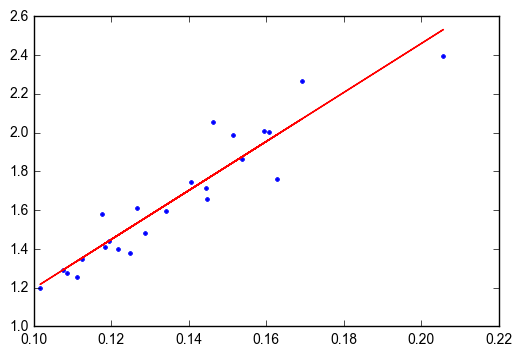

In [11]:
# This is the different between the quantity added by fractional desolvation and by the full complex
diff_frac = I[:,1]-I[:,0]
diff_real = I[:,2]-I[:,0]
plt.plot(diff_frac, diff_real,'.')

A = np.vstack([diff_frac, np.ones(len(diff_frac))]).T
m,c = np.linalg.lstsq(A, diff_real)[0]

plt.plot(diff_frac, m*diff_frac + c, 'r')

print 'The correlation is', np.corrcoef(diff_frac,diff_real)[0,1]
print 'The linear least squares regression slope is', m, 'and intercept is', c

## Igrid[atomI] appears to be off by a factor of 12.6!

In [12]:
# This is probably due to a unit conversion in a multiplicative prefactor

# This multiplicative prefactor is based on nanometers
r_min = 0.14
r_max = 1.0
print (1/r_min - 1/r_max)

# This multiplicative prefactor is based on angstroms
r_min = 1.4
r_max = 10.0
print (1/r_min - 1/r_max)

6.14285714286
0.614285714286


## Switching from nanometers to angstroms makes the multiplicative prefactor smaller, which is opposite of the desired effect!

In [13]:
4*np.pi

12.566370614359172

## Igrid[atomI] appears to be off by a factor of 4*pi!

In [ ]:
# This is after multiplication by 4*pi
# Sum for atom 0: 1.55022, 2.96246
# Sum for atom 1: 1.56983, 2.96756
# Sum for atom 2: 1.41972, 2.90796
# Sum for atom 3: 1.45936, 3.02879
# Sum for atom 4: 2.05316, 3.32989
# Sum for atom 5: 1.5354, 3.06405
# Sum for atom 6: 1.43417, 3.02438
# Sum for atom 7: 1.85508, 3.21875
# Sum for atom 8: 2.06909, 3.42013
# Sum for atom 9: 2.4237, 4.32524
# Sum for atom 10: 1.9603, 4.54512
# Sum for atom 11: 2.18017, 3.99349
# Sum for atom 12: 2.19774, 3.8152
# Sum for atom 13: 2.02152, 3.7884
# Sum for atom 14: 2.05662, 4.10305
# Sum for atom 15: 2.65659, 4.34157
# Sum for atom 16: 2.81839, 4.63688
# Sum for atom 17: 2.90653, 4.40561
# Sum for atom 18: 2.37779, 4.38092
# Sum for atom 19: 2.17795, 4.01659
# Sum for atom 20: 1.77652, 3.25573
# Sum for atom 21: 1.22359, 3.24223
# Sum for atom 22: 1.2336, 3.3604
# Sum for atom 23: 1.21771, 3.1483